<a href="https://colab.research.google.com/github/phanimusunuri1234/UNP_Assignment/blob/main/cltvcustomer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Problem Statement


VahanBima is one of the leading insurance companies in India. It provides motor vehicle insurances at best prices with 24/7 claim settlement.  It offers different types of policies for  both personal and commercial vehicles. It has established its brand across different regions in India. 

Around 90% of the businesses today use personalized services. The company wants to launch different personalized experience programs for customers of VahanBima. The personalized experience can be dedicated resources for claim settlement, different kinds of services at doorstep, etc. Inorder to do so, they would like to segment the customers into different tiers based on their customer lifetime value (CLTV).

Inorder to do it, they would like to predict the customer lifetime value based on the activity and interaction of the customer with the platform. So, as a part of this challenge, your task at hand is to build a high performance and interpretable machine learning model to predict the CLTV based on the user and policy data.


In [37]:
#importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

In [2]:
#load the train and test dataset
train=pd.read_csv("/content/train_BRCpofr.csv")
test=pd.read_csv("/content/test_koRSKBP.csv")

In [3]:
train.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,Male,Urban,Bachelor,5L-10L,1,5,5790,More than 1,A,Platinum,64308
1,2,Male,Rural,High School,5L-10L,0,8,5080,More than 1,A,Platinum,515400
2,3,Male,Urban,Bachelor,5L-10L,1,8,2599,More than 1,A,Platinum,64212
3,4,Female,Rural,High School,5L-10L,0,7,0,More than 1,A,Platinum,97920
4,5,Male,Urban,High School,More than 10L,1,6,3508,More than 1,A,Gold,59736


In [ ]:
train.isnull()

In [ ]:
train.describe()

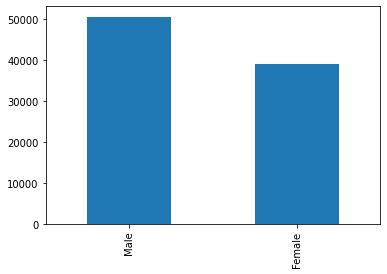

In [4]:
train['gender'].value_counts().plot(kind='bar')

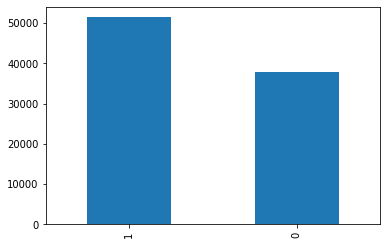

In [9]:
train['marital_status'].value_counts().plot(kind='bar')

<Figure size 432x360 with 0 Axes>

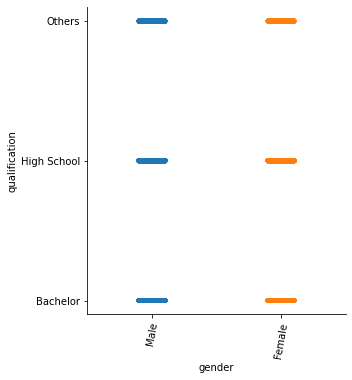

In [11]:
plt.figure(figsize=(6,5))
sns.catplot(x='gender', y='qualification', data=train)
plt.xlabel("gender")
plt.xticks(rotation=80)
plt.show()


<function matplotlib.pyplot.show(*args, **kw)>

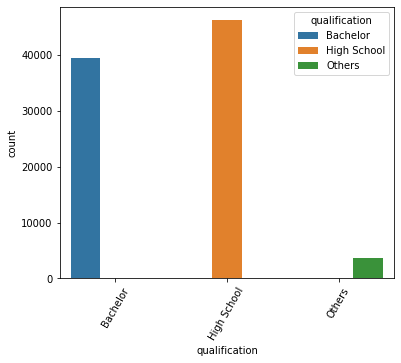

In [8]:
plt.figure(figsize=(6,5))
sns.countplot(x='qualification', hue='qualification', data=train)
plt.xlabel('qualification')
plt.xticks(rotation=60)
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

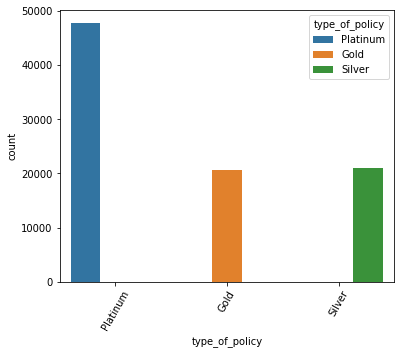

In [10]:
plt.figure(figsize=(6,5))
sns.countplot(x='type_of_policy', hue='type_of_policy', data=train)
plt.xlabel('type_of_policy')
plt.xticks(rotation=60)
plt.show

<Figure size 360x360 with 0 Axes>

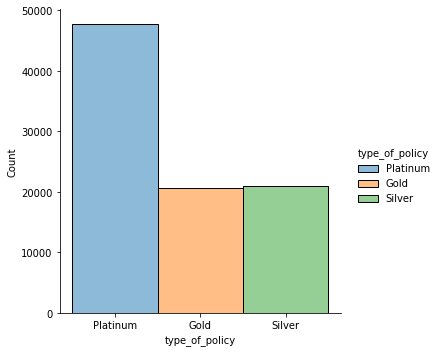

In [12]:
plt.figure(figsize=(5,5))
sns.displot(x='type_of_policy', hue='type_of_policy', data=train)
plt.show()

In [13]:
train.corr()

,id,marital_status,vintage,claim_amount,cltv
id,1.000000,0.000171,-0.005824,0.003634,-0.004223
marital_status,0.000171,1.000000,-0.011686,-0.114924,-0.077744
vintage,-0.005824,-0.011686,1.000000,0.009579,0.020608
claim_amount,0.003634,-0.114924,0.009579,1.000000,0.180344
cltv,-0.004223,-0.077744,0.020608,0.180344,1.000000


Text(0.5, 1.0, 'Heatmap displaying the relationship between the attributes of the data')

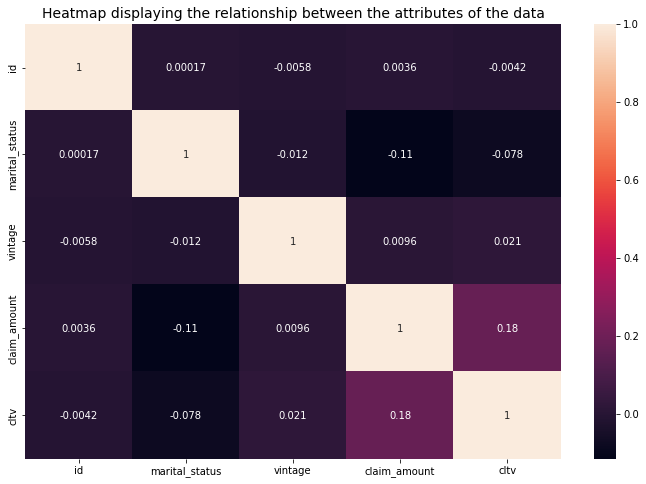

In [14]:
plt.figure(figsize=(12,8))
sns.heatmap(train.corr(),annot=True)
plt.title('Heatmap displaying the relationship between the attributes of the data',fontsize=14)

In [18]:
# preprocessing the data
# convert categorical variables to numerical values
le = LabelEncoder()
train['gender'] = le.fit_transform(train['gender'])
train['qualification'] = le.fit_transform(train['qualification'])
train['marital_status'] = le.fit_transform(train['marital_status'])
train['policy'] = le.fit_transform(train['policy'])
train['type_of_policy'] = le.fit_transform(train['type_of_policy'])

test['gender'] = le.fit_transform(test['gender'])
test['qualification'] = le.fit_transform(test['qualification'])
test['marital_status'] = le.fit_transform(test['marital_status'])
test['policy'] = le.fit_transform(test['policy'])
test['type_of_policy'] = le.fit_transform(test['type_of_policy'])

In [19]:
train.head()

,id,gender,area,qualification,income,marital_status,vintage,claim_amount,num_policies,policy,type_of_policy,cltv
0,1,1,Urban,0,5L-10L,1,5,5790,More than 1,0,1,64308
1,2,1,Rural,1,5L-10L,0,8,5080,More than 1,0,1,515400
2,3,1,Urban,0,5L-10L,1,8,2599,More than 1,0,1,64212
3,4,0,Rural,1,5L-10L,0,7,0,More than 1,0,1,97920
4,5,1,Urban,1,More than 10L,1,6,3508,More than 1,0,0,59736


In [40]:
 #select the features and target variable
X_train = train.drop(['id', 'cltv',"area","income","num_policies"], axis=1)
y_train = train['cltv']

# split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)


In [31]:
# train the model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [32]:
# make predictions on the validation set
y_pred = rf.predict(X_val)

In [43]:
# evaluate the model using MSE
mse = mean_squared_error(y_val, y_pred)
print(f'Validation MSE: {mse}')


Validation MSE: 8994986699.05384


In [44]:
 #make predictions on the test set
test_pred = rf.predict(X_val)
test_pred


array([ 93683.772    , 342294.96     ,  72169.68     , ...,
        80373.6      ,  67420.32     ,  71822.7580297])

In [45]:
r2_score(y_val,y_pred)*100

-12.41106042327058

In [50]:
test_pred = rf.predict(test.drop(columns=['id',"area","income","num_policies"]))

In [52]:
# Create a submission dataframe
# Create a submission dataframe
submission_df = pd.DataFrame({'id': test['id'], 'cltv': test_pred})


In [53]:
submission_df

,id,cltv
0,89393,73406.460000
1,89394,118827.800000
2,89395,71080.560000
3,89396,62881.915233
4,89397,69062.280000
...,...,...
59590,148983,73654.255718
59591,148984,49017.326333
59592,148985,69230.400000
59593,148986,69662.520000
